<a href="https://colab.research.google.com/github/apollomoon69/ML_predicting_house_prices/blob/main/ML_Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brian Moon - Kaggle Username: apollomoon

# 0. Python Importing Duties

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
import math

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Assignment 4 - CAP4611

# 1. Load Data

* Load the training data (trainD)

In [ ]:
trainD = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/assigment4/train.csv")

* Set id as index (drop index)

In [ ]:
trainD.set_index('id', inplace = True)
trainD.head(10)

longitude  latitude  ...  ocean_proximity  median_house_value
id                       ...                                     
0     -122.22     37.77  ...         NEAR BAY            114800.0
1     -122.29     37.76  ...         NEAR BAY            265400.0
2     -118.48     34.23  ...        <1H OCEAN            239900.0
3     -122.19     37.80  ...         NEAR BAY            257300.0
4     -121.93     36.63  ...       NEAR OCEAN            319800.0
5     -122.06     37.64  ...         NEAR BAY            146100.0
6     -117.94     33.77  ...        <1H OCEAN            170800.0
7     -117.93     33.90  ...        <1H OCEAN            500001.0
8     -117.39     34.13  ...           INLAND            119800.0
9     -118.21     34.21  ...        <1H OCEAN            450800.0

[10 rows x 10 columns]

* There is categorical data in the ocean_proximity column, let's try to look and see what the different values are; we might be able to deal with this data without resulting in additional rows from dummies.
> * I need to identify the unqiue values in this column

In [ ]:
trainD['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'ISLAND'],
      dtype=object)

* Let's replace these categorical data points with integers, island being closest proximity to the ocean, and inland having the greatest distance.

In [ ]:
trainD['ocean_proximity'].replace({'NEAR BAY':3.0, '<1H OCEAN':2.0, 'NEAR OCEAN':1.0,'INLAND': 4.0, 'ISLAND': 0.0}, inplace=True)
trainD

longitude  latitude  ...  ocean_proximity  median_house_value
id                          ...                                     
0        -122.22     37.77  ...              3.0            114800.0
1        -122.29     37.76  ...              3.0            265400.0
2        -118.48     34.23  ...              2.0            239900.0
3        -122.19     37.80  ...              3.0            257300.0
4        -121.93     36.63  ...              1.0            319800.0
5        -122.06     37.64  ...              3.0            146100.0
6        -117.94     33.77  ...              2.0            170800.0
7        -117.93     33.90  ...              2.0            500001.0
8        -117.39     34.13  ...              4.0            119800.0
9        -118.21     34.21  ...              2.0            450800.0
10       -118.17     34.66  ...              4.0            173200.0
11       -122.74     38.48  ...              2.0            178300.0
12       -119.19     34.17  ...              1.0            187300.0
13       -122.49     37.76  ...              3.0            329600.0
14       -117.20     32.80  ...              1.0            168400.0
15       -117.12     32.69  ...              1.0             88500.0
16       -118.44     34.32  ...              2.0            211600.0
17       -118.49     34.18  ...              2.0            311700.0
18       -117.67     33.46  ...              2.0            277800.0
19       -122.49     37.74  ...              1.0            321300.0
20       -117.81     33.73  ...              2.0            252800.0
21       -117.95     33.80  ...              2.0            214600.0
22       -122.04     37.62  ...              3.0            190400.0
23       -122.48     37.69  ...              1.0            264300.0
24       -118.08     33.83  ...              2.0            136800.0
25       -123.91     41.68  ...              2.0            152700.0
26       -117.25     32.82  ...              1.0            500001.0
27       -117.04     32.99  ...              2.0            314900.0
28       -122.29     37.81  ...              3.0             95200.0
29       -118.19     33.93  ...              2.0            145700.0
30       -121.45     38.55  ...              4.0             77600.0
31       -118.51     34.28  ...              2.0            301700.0
32       -118.29     34.16  ...              2.0            189800.0
33       -118.27     34.46  ...              4.0            294000.0
34       -120.32     37.29  ...              4.0             59600.0
35       -118.05     33.82  ...              2.0            386700.0
36       -117.16     33.76  ...              4.0            155400.0
37       -122.70     38.45  ...              2.0            190600.0
38       -118.48     34.04  ...              2.0            500001.0
39       -118.32     34.06  ...              2.0            337000.0
40       -121.32     38.62  ...              4.0            177900.0
41       -117.81     33.63  ...              2.0            410400.0
42       -120.83     35.36  ...              1.0            266800.0
43       -122.37     37.93  ...              3.0             84200.0
44       -121.53     38.50  ...              4.0            216800.0
45       -121.98     36.96  ...              1.0            258300.0
46       -118.20     34.05  ...              2.0            147200.0
47       -122.05     37.35  ...              2.0            388100.0
48       -117.09     32.73  ...              1.0            120300.0
49       -121.90     37.33  ...              2.0            200000.0
50       -118.52     34.22  ...              2.0            318100.0
51       -118.10     33.81  ...              2.0            246000.0
52       -118.44     34.29  ...              2.0            122900.0
53       -118.10     33.91  ...              2.0            167600.0
54       -118.45     34.01  ...              2.0            405800.0
55       -121.84     39.72  ...              4.0             69000.0
56   

* Load the test data

In [ ]:
testD = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/assigment4/test.csv")
testD.set_index('id', inplace = True)
testD['ocean_proximity'].replace ({'NEAR BAY':3.0, '<1H OCEAN':2.0, 'NEAR OCEAN':1.0,'INLAND': 4.0, 'ISLAND': 0.0}, inplace=True)

# 2. Look for Missing Values

In [ ]:
trainD.isna().sum().sum()

110

* Missing Values! :( No need to worry, we have python tools to help us replace these missing values. I will use ffill to promote values forward. We may need to replace these values with the mean if our model gets crazy results from propogating possible outliers.

In [ ]:
# stats before missing data fill
trainD.describe()

longitude      latitude  ...  ocean_proximity  median_house_value
count  10320.000000  10320.000000  ...     10320.000000        10320.000000
mean    -119.593791     35.647997  ...         2.614147       208222.779845
std        2.005209      2.132319  ...         1.060782       116152.666840
min     -124.350000     32.540000  ...         0.000000        14999.000000
25%     -121.810000     33.940000  ...         2.000000       120000.000000
50%     -118.535000     34.270000  ...         2.000000       180700.000000
75%     -118.010000     37.720000  ...         4.000000       267225.000000
max     -114.550000     41.920000  ...         4.000000       500001.000000

[8 rows x 10 columns]

In [ ]:
# trainD.fillna(value=0,inplace=True)
# testD.fillna(value=0,inplace=True)
trainD.fillna(method='ffill',inplace=True)
testD.fillna(method='ffill',inplace=True)

In [ ]:
trainD.isna().sum().sum()

0

* No more missing data, cool beans :)

In [ ]:
# stats after missing data fill
trainD.describe()

longitude      latitude  ...  ocean_proximity  median_house_value
count  10320.000000  10320.000000  ...     10320.000000        10320.000000
mean    -119.593791     35.647997  ...         2.614147       208222.779845
std        2.005209      2.132319  ...         1.060782       116152.666840
min     -124.350000     32.540000  ...         0.000000        14999.000000
25%     -121.810000     33.940000  ...         2.000000       120000.000000
50%     -118.535000     34.270000  ...         2.000000       180700.000000
75%     -118.010000     37.720000  ...         4.000000       267225.000000
max     -114.550000     41.920000  ...         4.000000       500001.000000

[8 rows x 10 columns]

* The data looks excellent other than the outliers (Did somebody say segue? lol)

# 3. Look for Outliers in the Data

* First, I will visualize the data with boxplots to look for any outliers

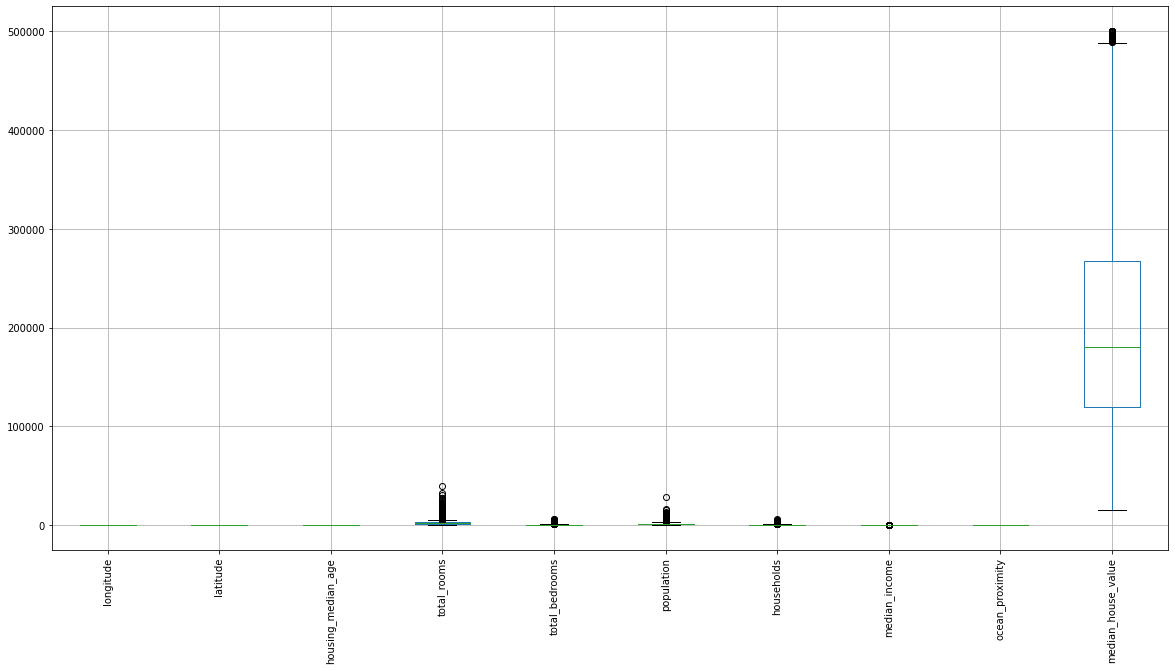

In [ ]:
trainD.loc[:, trainD.columns[trainD.max() <= 2000000].to_list()].boxplot(figsize=(20,10), rot=90);

* Outliers defintely present, lets try to take care of them by using the clamping method outlined in the notes.

In [ ]:
quartile1 = trainD.quantile(0.25)
quartile3 = trainD.quantile(0.75)
interQuartileRange = quartile3 - quartile1

variable1 = quartile1 - (interQuartileRange * 1.5)
variable2 = quartile3 + (interQuartileRange * 1.5)

# print((trainD > variable2) | (trainD < variable1))

# # Method 1: Determine (done in prev step) upper and lower values to use the whiskers of a box plot (1.5 * 1st quartile and 3rd quartile) - EDA
loopColumns = trainD.columns.to_list()
loopColumns.pop(-1)

# # clamping (iqr)
for col in loopColumns:
    trainD.loc[(trainD[col] > variable2[col]), col] = variable2[col]
    trainD.loc[(trainD[col] < variable1[col]), col] = variable1[col]
    testD.loc[(testD[col] > variable2[col]), col] = variable2[col]
    testD.loc[(testD[col] < variable1[col]), col] = variable1[col]

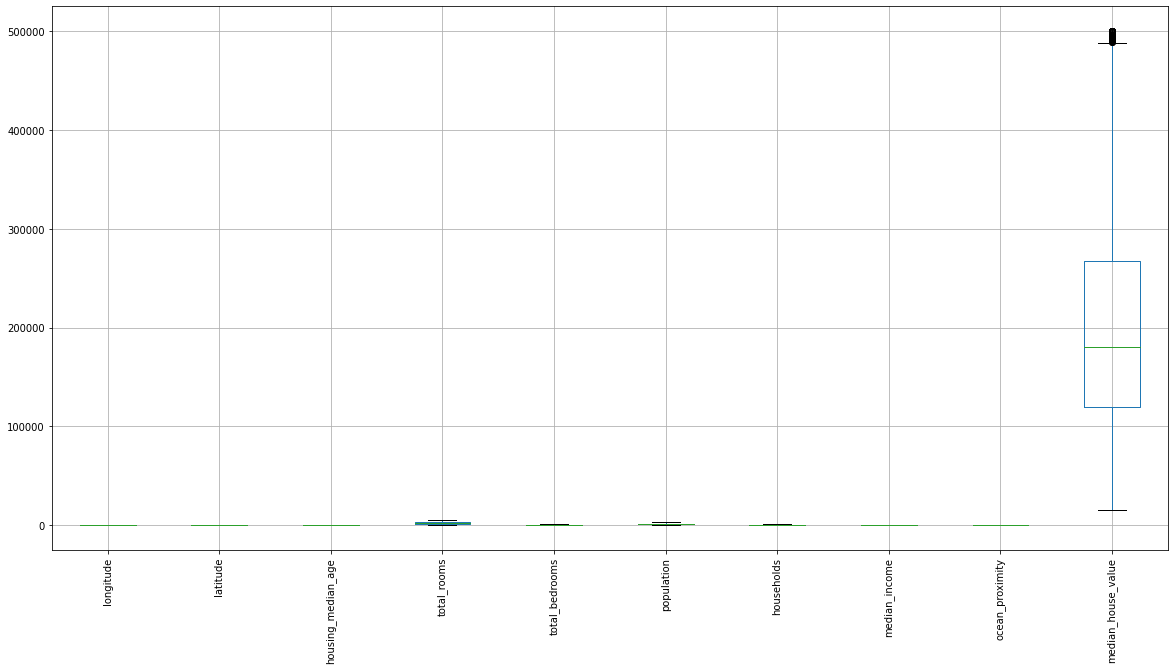

In [ ]:
trainD.loc[:, trainD.columns[trainD.max() <= 2000000].to_list()].boxplot(figsize=(20,10), rot=90);
# trainD.loc[:, trainD.columns[trainD.max() <= 200000].to_list()].boxplot(figsize=(20,10), rot=90); #for closer look

In [ ]:
# stats after outlier clamping
trainD.describe()

longitude      latitude  ...  ocean_proximity  median_house_value
count  10320.000000  10320.000000  ...     10320.000000        10320.000000
mean    -119.593791     35.647997  ...         2.614147       208222.779845
std        2.005209      2.132319  ...         1.060782       116152.666840
min     -124.350000     32.540000  ...         0.000000        14999.000000
25%     -121.810000     33.940000  ...         2.000000       120000.000000
50%     -118.535000     34.270000  ...         2.000000       180700.000000
75%     -118.010000     37.720000  ...         4.000000       267225.000000
max     -114.550000     41.920000  ...         4.000000       500001.000000

[8 rows x 10 columns]

* This data looks much more reasonable! Especially when looking at the maximum values versus the 75th percentile.

# 4. Split Data, Standardize Data, and Build/Train Model.

* Now that the data to predict housing prices has been prepared, let's start to build the models. The target is 'median_house_value' 
>Let's get the features and target, split the train data into train and tests. 
>>I'll start by testing the basic model, and the graphing the scores for each model to test their performance. NOTE: My hypothesis was to scale the data due to the different scales, but the results were not what I expected, leading me to hypothesize that the models are invariant to feature scaling; more testing needs to be done before reaching a confident conclusion. 

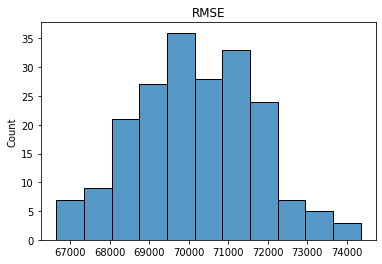

In [ ]:
from sklearn import metrics
val_f1 = []

for i in range(200):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = None)
  basic_model = ElasticNet()
  # scaler = StandardScaler().fit(x_train)
  # x_train = scaler.transform(x_train)
  # x_test = scaler.transform(x_test)
  basic_model.fit(x_train, y_train)
  y_pred = basic_model.predict(x_test)
  value = mean_squared_error(y_test, y_pred)
  val_f1.append(math.sqrt(value))

f, axs = plt.subplots()
axs.set_title("RMSE")
sns.histplot(val_f1)

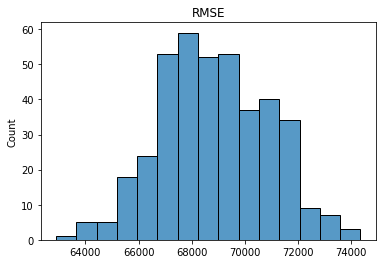

In [ ]:
for i in range(200):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = None)
  basic_model = linear_model.LinearRegression()
  # scaler = StandardScaler().fit(x_train)
  # x_train = scaler.transform(x_train)
  # x_test = scaler.transform(x_test)
  basic_model.fit(x_train, y_train)
  y_pred = basic_model.predict(x_test)
  value = mean_squared_error(y_test, y_pred)
  val_f1.append(math.sqrt(value))

f, axs = plt.subplots()
axs.set_title("RMSE")
sns.histplot(val_f1)

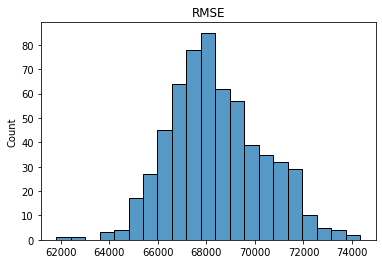

In [ ]:
for i in range(200):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = None)
  basic_model = Ridge()
  # scaler = StandardScaler().fit(x_train)
  # x_train = scaler.transform(x_train)
  # x_test = scaler.transform(x_test)
  basic_model.fit(x_train, y_train)
  y_pred = basic_model.predict(x_test)
  value = mean_squared_error(y_test, y_pred)
  val_f1.append(math.sqrt(value))

f, axs = plt.subplots()
axs.set_title("RMSE")
sns.histplot(val_f1)

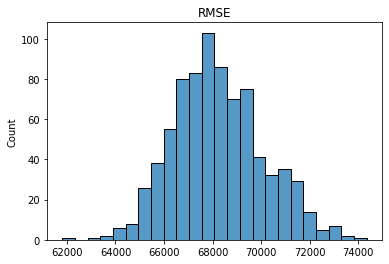

In [ ]:
for i in range(200):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = None)
  basic_model = linear_model.Lasso(max_iter=5000)
  # scaler = StandardScaler().fit(x_train)
  # x_train = scaler.transform(x_train)
  # x_test = scaler.transform(x_test)
  basic_model.fit(x_train, y_train)
  y_pred = basic_model.predict(x_test)
  value = mean_squared_error(y_test, y_pred)
  val_f1.append(math.sqrt(value))

f, axs = plt.subplots()
axs.set_title("RMSE")
sns.histplot(val_f1)

* The scores for all models are looking pretty good so far. 
> Let's lock in a model and submit to Kaggle to see how the baseline OLS model and the Ridge model perform in the real world.

In [ ]:
features = trainD.columns.tolist()
target = features.pop(-1) 
X = pd.get_dummies(trainD[features])
Y = trainD[target]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 40) 
# 1st: SUB 161 ffill for missing data; random state 40; model = Ridge()
# 2nd: SUB 160 zero fill for missing data; random state 40; model = Ridge()
# 3rd: SUB 154 random state 40; model = Ridge()
# 4th (lowest score over bench): SUB 153 random state 13; model = linear_model.LinearRegression()
model = Ridge()
# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

score = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", math.sqrt(score))

Mean Squared Error: 65551.27052544201


In [ ]:
X_test = pd.get_dummies(testD[features])

# X_test = scaler.transform(X_test)

predictionsFinal = model.predict(X_test)

In [ ]:
output = pd.DataFrame({'id': testD.index, 'median_house_value': predictionsFinal.astype(int)})
output.to_csv('my_submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# 5. Summary

* Full submission; below this is just the target vector printed out with the index. (my_submission-160.csv) 

In [ ]:
# force output to show all rows
pd.set_option('display.max_rows', 10321)
output

id  median_house_value
0          0              128069
1          1              304089
2          2              126170
3          3              171307
4          4              171047
5          5              320613
6          6              153120
7          7              110146
8          8              255199
9          9               89041
10        10              185845
11        11              168893
12        12              234723
13        13              114062
14        14              259816
15        15              226712
16        16              399763
17        17               77747
18        18              126731
19        19              284985
20        20              318646
21        21              438434
22        22              100353
23        23               58046
24        24              158009
25        25              153137
26        26              106073
27        27              313410
28        28              130826
29        29              175837
30        30               72854
31        31              298007
32        32              203328
33        33              302517
34        34              242192
35        35               52967
36        36              264513
37        37              345070
38        38              285469
39        39              149237
40        40              273062
41        41              233764
42        42              283018
43        43              168485
44        44              122307
45        45               97966
46        46              323544
47        47               66304
48        48              351263
49        49              233976
50        50              238055
51        51              130929
52        52              267706
53        53              268289
54        54              125523
55        55               82759
56        56               88994
57        57               78668
58        58              340311
59        59              321915
60        60              217789
61        61              157998
62        62              130211
63        63              133337
64        64               71739
65        65              197887
66        66               81712
67        67              364827
68        68              276081
69        69              318715
70        70              251735
71        71              238552
72        72               71305
73        73               24790
74        74              243524
75        75              142854
76        76              205575
77        77              275528
78        78              389851
79        79              149265
80        80              211180
81        81              246186
82        82              255921
83        83               46424
84        84              326678
85        85              285400
86        86               32176
87        87              226412
88        88              195625
89        89              366438
90        90              148833
91        91              282152
92        92              321876
93        93              226452
94        94              331249
95        95              103979
96        96              174239
97        97              173546
98        98              394962
99        99              214930
100      100              169609
101      101               86583
102      102              163009
103      103               89604
104      104              153245
105      105              190292
106      106              279100
107      107              328000
108      108              211078
109      109              138753
110      110               79644
111      111              386751
112      112              158020
113      113              183509
114      114              210197
115      115              183982
116      116               89141
117      117              173569
118      118              236297
119      119              219608
120      120     

* Outputting just the target vector.

In [ ]:
output.median_house_value

0        128069
1        304089
2        126170
3        171307
4        171047
5        320613
6        153120
7        110146
8        255199
9         89041
10       185845
11       168893
12       234723
13       114062
14       259816
15       226712
16       399763
17        77747
18       126731
19       284985
20       318646
21       438434
22       100353
23        58046
24       158009
25       153137
26       106073
27       313410
28       130826
29       175837
30        72854
31       298007
32       203328
33       302517
34       242192
35        52967
36       264513
37       345070
38       285469
39       149237
40       273062
41       233764
42       283018
43       168485
44       122307
45        97966
46       323544
47        66304
48       351263
49       233976
50       238055
51       130929
52       267706
53       268289
54       125523
55        82759
56        88994
57        78668
58       340311
59       321915
60       217789
61       157998
62      

Brian Moon - Kaggle Username: apollomoon